# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/meu87/Documents/Python Data Science Mastery/03_MACHINE_LEARNING/07_PROYECTOS/01_SCORING'

Nombres de los ficheros de datos.

In [5]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [6]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [7]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [8]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [9]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.04,0.00,0.00,0.00,LogisticRegression(),1.00,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.87,0.87,0.87,0.00,1
13,0.04,0.00,0.00,0.00,LogisticRegression(),0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.87,0.87,0.87,0.00,2
9,0.05,0.00,0.00,0.00,LogisticRegression(),0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.87,0.87,0.87,0.00,3
18,0.04,0.00,0.00,0.00,LogisticRegression(),1.00,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.87,0.87,0.87,0.00,4
14,0.03,0.00,0.00,0.00,LogisticRegression(),0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.86,0.87,0.87,0.00,5
5,0.04,0.01,0.00,0.00,LogisticRegression(),0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.86,0.87,0.87,0.00,6
10,0.04,0.01,0.00,0.00,LogisticRegression(),0.50,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.86,0.87,0.87,0.00,7
6,0.04,0.00,0.00,0.00,LogisticRegression(),0.25,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.86,0.86,0.87,0.86,0.00,8
16,0.00,0.00,0.00,0.00,LogisticRegression(),1.00,-1,elasticnet,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,9
15,0.00,0.00,0.00,0.00,LogisticRegression(),0.75,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,9


####  Con random search

In [8]:
# random_search = RandomizedSearchCV(estimator = pipe,
#                                    param_distributions = grid, 
#                                    n_iter = 5, 
#                                    cv = 3, 
#                                    scoring = 'roc_auc', 
#                                    verbose = 0,
#                                    n_jobs = -1)

# modelo = random_search.fit(train_x,train_y)

# pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__scoring,param_algoritmo__min_samples_leaf,param_algoritmo__max_iter,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo__l2_regularization,...,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,1.87,0.03,0.02,0.00,NaN,NaN,NaN,20,0.03,NaN,...,0,1,1,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.81,0.78,0.80,0.79,0.01,1
2,0.21,0.01,0.03,0.00,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.80,0.77,0.80,0.79,0.01,2
0,0.60,0.02,0.06,0.01,roc_auc,500,100,20,0.05,0.75,...,NaN,NaN,NaN,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.79,0.77,0.79,0.79,0.01,3
4,1.47,0.09,0.03,0.02,NaN,NaN,NaN,10,0.01,NaN,...,0,0.01,0,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.79,0.77,0.78,0.78,0.01,4
1,0.38,0.00,0.04,0.01,roc_auc,500,50,10,0.01,0.75,...,NaN,NaN,NaN,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.79,0.76,0.78,0.78,0.01,5


## EVALUAR

### Predecir sobre validación

In [10]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [11]:
roc_auc_score(val_y, pred)

0.8794014222542808

### Examinar el mejor modelo

In [12]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    solver='saga'))])

In [21]:
modelo.best_estimator_.named_steps.algoritmo.coef_[0]

array([ 4.268579  ,  9.09267081,  1.03526343,  1.77643052, -2.56820945,
        0.93908929, -0.59774554,  1.88487563, -0.5484703 , -1.42258171,
        0.5837146 , -1.00723654, -0.73824504,  2.30520357, -0.05780199])

In [17]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'visitas_total_mms',
       'paginas_vistas_visita_mms', 'score_perfil_mms', 'ambito_Select',
       'ocupacion_Working Professional', 'ocupacion_Unemployed',
       'ult_actividad_Converted to Lead', 'descarga_lm_No',
       'ult_actividad_Chat Conversation',
       'ult_actividad_Page Visited on Website', 'origen_Lead Add Form',
       'fuente_Google'], dtype=object)

In [27]:
pd.DataFrame({'nombres': modelo.best_estimator_.named_steps.algoritmo.feature_names_in_, 'coeficientes':modelo.best_estimator_.named_steps.algoritmo.coef_[0] },).sort_values(by='coeficientes', ascending=False)

,nombres,coeficientes
1,score_actividad_mms,9.09
0,tiempo_en_site_total_mms,4.27
13,origen_Lead Add Form,2.31
7,ocupacion_Working Professional,1.88
3,visitas_total_mms,1.78
2,ult_actividad_SMS Sent,1.04
5,score_perfil_mms,0.94
10,descarga_lm_No,0.58
14,fuente_Google,-0.06
8,ocupacion_Unemployed,-0.55


## REPORTING DEL MODELO

### Gain Chart

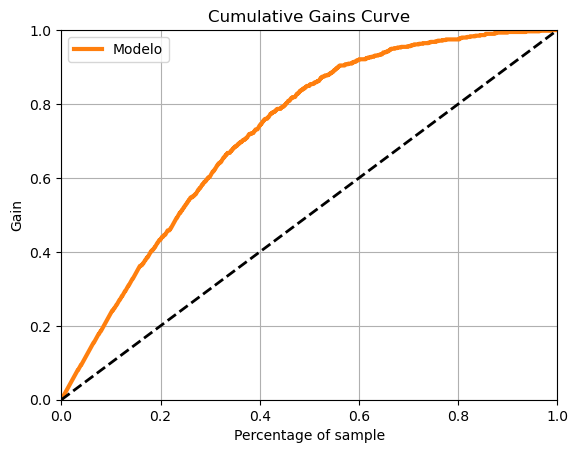

In [13]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

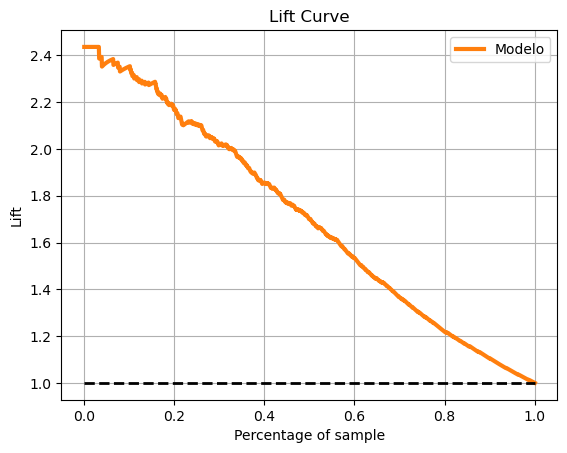

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

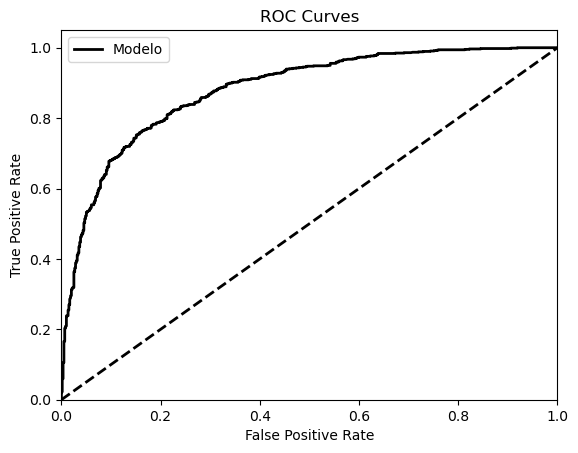

In [15]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();
